In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(0)

In [3]:
crime= pd.read_csv("State+UT Wise Crime Data of India (IPC) 2001-2019 .csv")

In [4]:
crime

,Serial Number,Category,State/UT,Year,Crime Count,Population (in lakhs),Crime Rate
0,29,Union Territory,A & N Islands,2001,658,3.56,184.831461
1,1,State,Andhra Pradesh,2001,130089,757.28,171.784545
2,2,State,Arunachal Pradesh,2001,2342,10.91,214.665445
3,3,State,Assam,2001,36877,266.38,138.437570
4,4,State,Bihar,2001,88432,828.79,106.700129
...,...,...,...,...,...,...,...
660,24,State,Tamil Nadu,2019,168116,758.10,221.759662
661,25,State,Tripura,2019,5336,40.00,133.400000
662,26,State,Uttar Pradesh,2019,353131,2259.70,156.273399
663,27,State,Uttarakhand,2019,12081,111.80,108.059034


In [5]:
crime = crime[["Year","Category","State/UT","Crime Rate"]]
# crime = crime.rename({"Crime Rate": "Crime_Rate"}, axis=1)
# crime = crime.rename({"State/UT": "State_UT"}, axis=1)
crime

,Year,Category,State_UT,Crime_Rate
0,2001,Union Territory,A & N Islands,184.831461
1,2001,State,Andhra Pradesh,171.784545
2,2001,State,Arunachal Pradesh,214.665445
3,2001,State,Assam,138.437570
4,2001,State,Bihar,106.700129
...,...,...,...,...
660,2019,State,Tamil Nadu,221.759662
661,2019,State,Tripura,133.400000
662,2019,State,Uttar Pradesh,156.273399
663,2019,State,Uttarakhand,108.059034


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [7]:

X = crime[['Year', 'Category', 'State_UT']]
y = crime['Crime_Rate']


transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X_encoded = transformer.fit_transform(X)


scaler = StandardScaler(with_mean=False)  # Do not center sparse matrices
X_scaled = scaler.fit_transform(X_encoded)


X_reshaped = X_scaled.toarray().reshape((X_scaled.shape[0], X_scaled.shape[1], 1))


X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))  


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)



Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 51192.0352 - mae: 183.4088 - val_loss: 23106.1367 - val_mae: 131.2583
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31844.8848 - mae: 129.1203 - val_loss: 11962.2734 - val_mae: 86.4960
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24225.7109 - mae: 93.5438 - val_loss: 6352.6802 - val_mae: 62.2426
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16849.5195 - mae: 83.8613 - val_loss: 6673.2935 - val_mae: 65.2937
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17200.8379 - mae: 89.0669 - val_loss: 6881.7627 - val_mae: 66.6908
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14794.3145 - mae: 85.4210 - val_loss: 5940.2842 - val_mae: 60.3965
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18715.2695 - mae: 81.6884 - val_loss: 5816.2300 - val_mae: 59.0279
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15375.4473 - mae: 79.8588 - val_loss: 5756.3647 - val_mae: 58.6616
Epoch 9/5

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 36, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,909 (1.69 MB)

 Trainable params: 147,969 (578.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 295,940 (1.13 MB)

In [9]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [10]:

mse, mae = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12851.8564 - mae: 49.9680


In [20]:
from sklearn.metrics import r2_score

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

Mean Absolute Error: 51.27320098876953
Mean Squared Error: 50.037109375
R-squared (R^2): 0.42503711339419337


In [12]:
predictions = model.predict(X_test)

print("Predictions:")
print(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predictions:
[[211.20595 ]
 [238.02458 ]
 [173.16464 ]
 [412.90076 ]
 [257.5979  ]
 [220.65402 ]
 [173.63875 ]
 [220.93848 ]
 [ 69.08983 ]
 [254.40193 ]
 [184.84206 ]
 [220.84367 ]
 [235.05852 ]
 [191.69644 ]
 [191.79124 ]
 [181.27242 ]
 [242.14664 ]
 [ 67.979515]
 [234.67924 ]
 [112.34548 ]
 [160.58669 ]
 [235.24818 ]
 [257.2186  ]
 [184.19783 ]
 [118.54804 ]
 [242.90521 ]
 [ 68.81227 ]
 [191.88605 ]
 [309.97342 ]
 [237.45567 ]
 [158.34012 ]
 [189.59453 ]
 [310.8268  ]
 [231.97665 ]
 [159.84859 ]
 [159.75499 ]
 [234.29996 ]
 [ 82.52685 ]
 [219.70583 ]
 [118.64057 ]
 [211.51915 ]
 [ 84.10463 ]
 [159.5678  ]
 [210.92148 ]
 [160.41017 ]
 [166.40868 ]
 [ 77.37407 ]
 [210.28645 ]
 [254.30713 ]
 [413.1852  ]
 [113.178215]
 [194.27936 ]
 [ 75.98619 ]
 [238.87798 ]
 [166.0095  ]
 [162.009   ]
 [ 76.726395]
 [211.04503 ]
 [423.43634 ]
 [ 81.601616]
 [188.55151 ]
 [112.25294 ]
 [234.1103  ]
 [ 67.887   ]
 [ 76.263756]
 [233.39896 ]
 [309.78378 ]
 [185.6006 

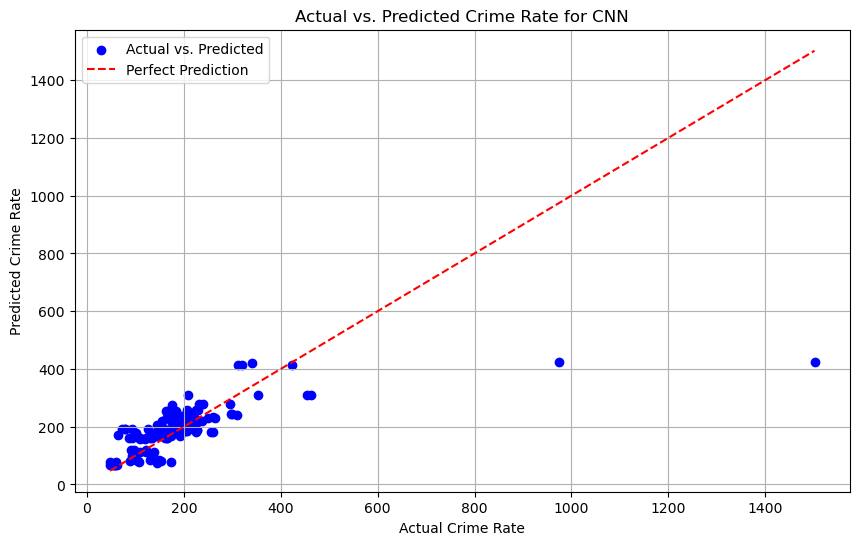

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs. Predicted Crime Rate for CNN')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
def predict_crime_rate():
    user_input_year = int(input("Enter the year: "))
    user_input_category = input("Enter the category: ")
    user_input_state = input("Enter the state/UT: ")


    user_input = pd.DataFrame({'Year': [user_input_year], 'Category': [user_input_category], 'State_UT': [user_input_state]})
    user_input_encoded = transformer.transform(user_input)
    user_input_scaled = scaler.transform(user_input_encoded)
    user_input_reshaped = user_input_scaled.toarray().reshape((1, user_input_scaled.shape[1], 1))

    predicted_crime_rate = model.predict(user_input_reshaped)[0][0]

    print("Predicted Crime Rate for "+str(user_input_year)+" "+user_input_category+" "+user_input_state+": ", predicted_crime_rate)


predict_crime_rate()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Crime Rate for 2020 State Andhra Pradesh:  212.249


In [15]:
from keras.models import load_model


model.save('CNNcrime_rate_prediction_model.h5')

In [16]:

loaded_model = load_model('CNNcrime_rate_prediction_model.h5')

In [17]:
from keras.optimizers import Adam


optimizer = Adam(learning_rate=0.001)

In [18]:
loaded_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
predictionsNEW = loaded_model.predict(X_test)


history = loaded_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6553.9258 - mae: 52.0242 - val_loss: 2825.8589 - val_mae: 42.8192
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6011.5566 - mae: 50.1598 - val_loss: 2844.0825 - val_mae: 41.7372
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5710.2866 - mae: 50.4751 - val_loss: 2804.8457 - val_mae: 42.9293
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7044.0161 - mae: 51.7142 - val_loss: 2827.8459 - val_mae: 41.5981
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6120.7383 - mae: 49.4197 - val_loss: 2754.7957 - val_mae: 41.8401
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6026.0103 - mae: 51.9925 - val_loss: 2748.5095 - val_mae: 41.4288
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5653.1699 - mae: 48.3717 - val_loss: 2728.0735 - val_mae: 41.2435
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5406.3770 - mae: 47.2768 - val_loss: 2689.1033 - v

In [19]:
predictionsNEW

array([[211.20595 ],
       [238.02458 ],
       [173.16464 ],
       [412.90076 ],
       [257.5979  ],
       [220.65402 ],
       [173.63875 ],
       [220.93848 ],
       [ 69.08983 ],
       [254.40193 ],
       [184.84206 ],
       [220.84367 ],
       [235.05852 ],
       [191.69644 ],
       [191.79124 ],
       [181.27242 ],
       [242.14664 ],
       [ 67.979515],
       [234.67924 ],
       [112.34548 ],
       [160.58669 ],
       [235.24818 ],
       [257.2186  ],
       [184.19783 ],
       [118.54804 ],
       [242.90521 ],
       [ 68.81227 ],
       [191.88605 ],
       [309.97342 ],
       [237.45567 ],
       [158.34012 ],
       [189.59453 ],
       [310.8268  ],
       [231.97665 ],
       [159.84859 ],
       [159.75499 ],
       [234.29996 ],
       [ 82.52685 ],
       [219.70583 ],
       [118.64057 ],
       [211.51915 ],
       [ 84.10463 ],
       [159.5678  ],
       [210.92148 ],
       [160.41017 ],
       [166.40868 ],
       [ 77.37407 ],
       [210.2